# XY plots

XY plots are achieved by using the [plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) function

## Simple XY plots

In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
z = np.cos(x)
t = np.tan(x)
t = np.ma.masked_where(np.abs(t) > 100, t)

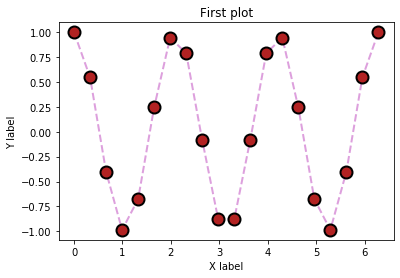

In [15]:
fig = plt.figure() #  initialize figure
ax = plt.gca() # initialize axis (here, optional)
plt.plot(x, y, color='Plum', linestyle='--', linewidth=2,
         marker='o', markeredgewidth=2, markerfacecolor='FireBrick',
         markeredgecolor='black', markersize=12)
plt.title('First plot')
plt.xlabel('X label')
plt.ylabel('Y label')

# plt.savefig('figs/xy.pdf', bbox_inches='tight') # save the figure
# tight: remove the white spaces around the figure  

plt.show()  # display the figure 
       
plt.close(fig)

## Multiline XY plots

There is several ways to plot multiline XY plots. 

First, this can be achieved by using the `label` argument of the `plot` function:

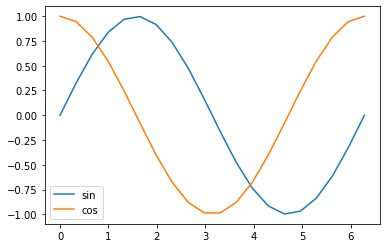

In [3]:
fig = plt.figure()
ax = plt.gca()
l0 = plt.plot(x, y, label='sin')
l1 = plt.plot(x, z, label='cos')
leg = plt.legend(fontsize=10, loc=0, ncol=1)
plt.show()

You can also set the legend by providing a list of `matplotlib.lines.Line2D` objects and their corresponding labels. However, it remains to user to be sure that the right label goes with the right line.

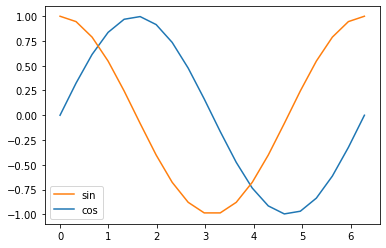

In [4]:
fig = plt.figure()
ax = plt.gca()
l0 = plt.plot(x, y)
l1 = plt.plot(x, z)
leg = plt.legend([l1[0], l0[0]], ['sin', 'cos'], loc=0, ncol=1, fontsize=10)
plt.show()

1D Arrays can be comined into a multidimensional one prior to plotting. The first dimension of the `y` array must have the same number
of elements as the `x` array.

In this case, the user needs to set the legend by providing the list of the corresponding labels (the user must insure that the right label goes with the right line)

(20, 2)


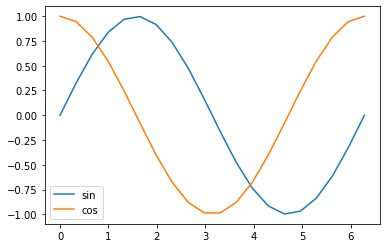

In [5]:
arr =  np.array([y, z]).T
print(arr.shape)

fig = plt.figure()
ax = plt.gca()
plt.plot(x, arr)
leg = plt.legend(['sin', 'cos'], loc=0, ncol=1, fontsize=10)

If several legends should be plotted, they must be added to the current graph by using the `matplotlib.axes.Axes.add_artist` function:

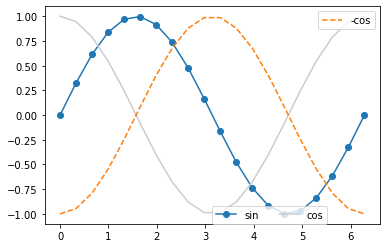

In [6]:
fig = plt.figure() #initialize figure
ax = plt.gca()

l0 = plt.plot(x, y, marker='o')
l1 = plt.plot(x, z, color='0.8')
l2 = plt.plot(x, -z, linestyle='--')

# Draw the legend for the 
leg1 = plt.legend([l0[0], l1[0]], ['sin', 'cos'], 
                  loc=(0.5, 0), ncol=2)
# add legend to the axes
ax.add_artist(leg1)

# Draw second legend
leg2 = plt.legend([l2[0]], ['-cos'], loc=1)
plt.show()

## Using colortable colors

To use colormap colors to draw xy plots, you first need to define a colormap object:

In [7]:
cmap = plt.cm.jet # Defining colormap (cf. matplotlib website)
print(cmap(0))  # picks the first color (blue)
print(cmap(1.))  # picks the first color (red)

(0.0, 0.0, 0.5, 1.0)
(0.5, 0.0, 0.0, 1.0)


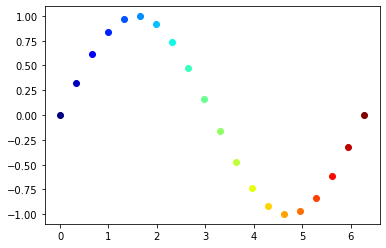

In [8]:
plt.figure()
cmap = plt.cm.jet # Defining colormap (cf. matplotlib website)
for p in range(0, len(x)):
    cindex = p / (len(x) - 1)  # value between 0 and 1
    color = cmap(cindex)
    plt.plot(x[p:p+1], y[p:p+1], color=color, linestyle='none', marker='o') 
plt.show()

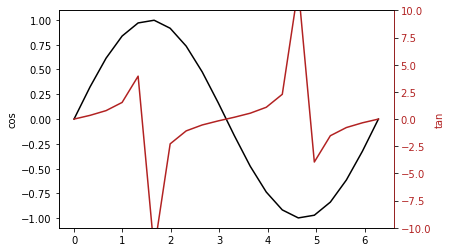

In [9]:
# Shared x and y axis
plt.figure()
ax1 = plt.gca()
ax1.plot(x, y, 'k')
ax1.set_ylabel('cos', color='k')

ax2 = ax1.twinx()
ax2.plot(x, t, color='FireBrick')
ax2.set_ylim(-10, 10)
ax2.set_ylabel('tan', color='FireBrick')
plt.setp(ax2.get_yticklabels(), color='FireBrick')
ax2.spines['right'].set_color('FireBrick')

plt.show()

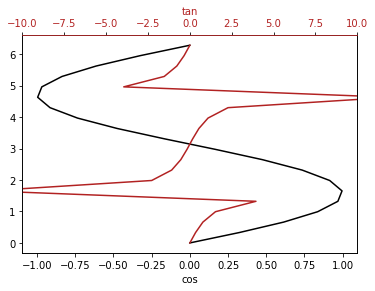

In [10]:
plt.figure()
ax1 = plt.gca()
ax1.plot(y, x, 'k')
ax1.set_xlabel('cos', color='k')

ax2 = ax1.twiny()
ax2.plot(t, x, color='FireBrick')
ax2.set_xlabel('tan', color='FireBrick')
ax2.set_xlim(-10, 10)
plt.setp(ax2.get_xticklabels(), color='FireBrick')
ax2.spines['top'].set_color('FireBrick')

plt.show()

## Filled XY plots

Filled XY plots are achieved by using the [fill_between](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html) function. 

It is highly recommended to set `interpolate` to True to insure a proper layout.

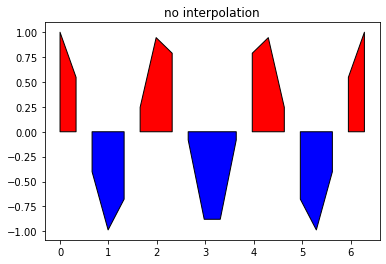

In [13]:
y = np.cos(3 * x)

fig = plt.figure()
ax = plt.gca()
ax.set_title('no interpolation')
ax.fill_between(x, 0, y, facecolor='r', where=y>0, 
                 interpolate=False, edgecolor='k')
ax.fill_between(x, 0, y, facecolor='b', where=y<0,
                 interpolate=False, edgecolor='k')
plt.show()

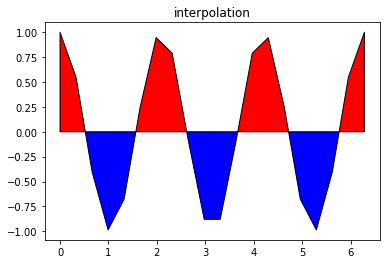

In [14]:
fig = plt.figure()
ax = plt.gca()
ax.set_title('interpolation')
ax.fill_between(x, 0, y, facecolor='r', where=y>0, 
                 interpolate=True, edgecolor='k')
ax.fill_between(x, 0, y, facecolor='b', where=y<0,
                 interpolate=True, edgecolor='k')
plt.show()